In [ ]:
!pip install pandas
!pip install Tweepy
!pip install vaderSentiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

import missingno
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)



In [ ]:
import plotly.express as px

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/MutyalaHaripriya/reviewsamazon/master/AllProductReviews.csv")

In [ ]:
data1=pd.read_csv("https://raw.githubusercontent.com/MutyalaHaripriya/reviewsamazon/master/ProductInfo.csv")

In [ ]:
data.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [ ]:
data.shape

(14337, 4)

In [ ]:
data1.shape

(10, 6)

In [ ]:
data1

,MRP,Price,ProductFullName,ProductShortName,ReviewURL,id
0,2990,1399,boAt Rockerz 255 Sports Bluetooth Wireless Ear...,boAt Rockerz 255,https://www.amazon.in/255-Bluetooth-Wireless-E...,1
1,3999,1099,Flybot Wave in-Ear Sport Wireless Bluetooth Ea...,Flybot Wave,https://www.amazon.in/Flybot-Wireless-Bluetoot...,2
2,3999,1099,Flybot Boom Deep Bass in-Ear Wireless Bluetoot...,Flybot Boom,https://www.amazon.in/Flybot-Wireless-Bluetoot...,3
3,2000,749,PTron Intunes Pro Headphone Magnetic Earphone ...,PTron Intunes,https://www.amazon.in/PTron-Intunes-Pro-Smartp...,4
4,5999,2999,Flybot Beat True Wireless Bluetooth Earphones ...,Flybot Beat,https://www.amazon.in/Flybot-Wireless-Bluetoot...,5
5,3799,3190,Samsung EO-BG950CBEGIN Bluetooth Wireless in-E...,Samsung EO-BG950CBEIN,https://www.amazon.in/Samsung-EO-BG950CBEGIN-B...,6
6,2999,1999,JBL T205BT Pure Bass Wireless Metal Earbud Hea...,JBL T205BT,https://www.amazon.in/JBL-T205BT-Wireless-Earb...,7
7,7490,6499,Sennheiser CX 6.0BT 507447 in Ear Wireless Ear...,Sennheiser CX 6.0BT,https://www.amazon.in/Sennheiser-CX-507447-Wir...,8
8,5299,3699,Skullcandy S2PGHW-174 in-Ear Wireless Headphon...,Skullcandy S2PGHW-174,https://www.amazon.in/Skullcandy-S2PGHW-174-Wi...,9
9,2259,2000,JBL T110BT Pure Bass Wireless in-Ear Headphone...,JBL T110BT,https://www.amazon.in/JBL-T110BT-Wireless-Head...,10


In [ ]:
boat255=data[data.Product=="boAt Rockerz 255"]

In [ ]:
boat255.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [ ]:
boat255=data[data.Product=="boAt Rockerz 255"]

In [ ]:
flybotwave=data[data.Product=="Flybot Wave"]

In [ ]:
flybotboom=data[data.Product=="Flybot Boom"]

In [ ]:
PTronintunes=data[data.Product=="PTron Intunes"]

In [ ]:
flybotbeat=data[data.Product=="Flybot Beat"]

In [ ]:
samsungeo=data[data.Product=="Samsung EO-BG950CBEIN"]

In [ ]:
jblt2=data[data.Product=="JBL T205BT"]

In [ ]:
jblt1=data[data.Product=="JBL T110BT"]

In [ ]:
skullcandy=data[data.Product=="Skullcandy S2PGHW-174"]

In [ ]:
seinh=data[data.Product=="Sennheiser CX 6.0BT"]

In [ ]:
dblist=[boat255,flybotwave,flybotboom,flybotbeat,PTronintunes,samsungeo,jblt2,jblt1,skullcandy,seinh]

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:

sia=SentimentIntensityAnalyzer()

In [ ]:
def scores(x):
    list1=[]
    x.reset_index(inplace=True)
    x.drop("index",axis=1,inplace=True)
    for i in x.ReviewBody:
        list1.append(sia.polarity_scores(i))
    x[["Negative","Neutral","Positive","Compound"]]=pd.DataFrame(list1)

In [ ]:
for j in dblist:
    scores(j)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
boat255.head()

,ReviewTitle,ReviewBody,ReviewStar,Product,Negative,Neutral,Positive,Compound
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,0.268,0.657,0.075,-0.9580
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,0.073,0.884,0.043,-0.2528
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,0.021,0.928,0.052,0.5569
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,0.061,0.833,0.105,0.1779
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,0.093,0.760,0.147,0.2831


In [ ]:
boat255.head()

,ReviewTitle,ReviewBody,ReviewStar,Product,Negative,Neutral,Positive,Compound
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,0.268,0.657,0.075,-0.9580
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,0.073,0.884,0.043,-0.2528
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,0.021,0.928,0.052,0.5569
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,0.061,0.833,0.105,0.1779
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,0.093,0.760,0.147,0.2831


In [ ]:
def cls(x):
    list5=[]
    for i in x["Compound"]:
        if i>0:
            list5.append("Positive")
        elif i==0:
            list5.append("Neutral")
        else:
            list5.append("Negative")
    x["Score"]=list5

In [ ]:
for j in dblist:
    cls(j)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
boat255.head()

,ReviewTitle,ReviewBody,ReviewStar,Product,Negative,Neutral,Positive,Compound,Score
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,0.268,0.657,0.075,-0.9580,Negative
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,0.073,0.884,0.043,-0.2528,Negative
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,0.021,0.928,0.052,0.5569,Positive
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,0.061,0.833,0.105,0.1779,Positive
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,0.093,0.760,0.147,0.2831,Positive


In [ ]:
boat255["Score"].value_counts()

Positive    3270
Negative    1313
Neutral      417
Name: Score, dtype: int64

In [ ]:
import plotly.graph_objs as go
nltk.download('punkt')

Mno=boat255[boat255.Score=="Positive"]["Score"].count()
Fno=boat255[boat255.Score=="Negative"]["Score"].count()
Nno=boat255[boat255.Score=="Neutral"]["Score"].count()
labels = ["Positive Comments","Negative Comments","Neutral Comments"]
values = [Mno,Fno,Nno]
fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=0.5)])
fig.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def keys(x):
    a = [None] * len(x)
    for i in range(0,(len(x)-1)):
        list3=[]
        blob = TextBlob(x.iloc[i][1])
        for word, tag in blob.tags:
            if (tag=="JJ")| (tag=="VBN")| (tag=="NNS")| (tag=="NN"):
                list3.append(word.lemmatize())
            a[i]=list3
    x["Keywords"]=a    

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
for j in dblist:
    keys(j)

In [ ]:
boat255.head()

,ReviewTitle,ReviewBody,ReviewStar,Product,Negative,Neutral,Positive,Compound,Score
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,0.268,0.657,0.075,-0.9580,Negative
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,0.073,0.884,0.043,-0.2528,Negative
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,0.021,0.928,0.052,0.5569,Positive
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,0.061,0.833,0.105,0.1779,Positive
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,0.093,0.760,0.147,0.2831,Positive


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
stop_words=set(stopwords.words("english"))

In [ ]:
filtered_sentence=[]

In [ ]:
def filter(x):
    a = [None] * len(x)
    for i in range(0,(len(x)-1)):
        list3=[]
        blob = word_tokenize(x.iloc[i][1])
        for word in blob:
            if word not in stop_words:
                list3.append(word)
            a[i]=list3
    x["filter"]=a    

In [ ]:
boat255.head()

,ReviewTitle,ReviewBody,ReviewStar,Product,Negative,Neutral,Positive,Compound,Score
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,0.268,0.657,0.075,-0.9580,Negative
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,0.073,0.884,0.043,-0.2528,Negative
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,0.021,0.928,0.052,0.5569,Positive
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,0.061,0.833,0.105,0.1779,Positive
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,0.093,0.760,0.147,0.2831,Positive


In [ ]:
for j in dblist:
    filter(j)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
boat255.head()

,ReviewTitle,ReviewBody,ReviewStar,Product,Negative,Neutral,Positive,Compound,Score,filter
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,0.268,0.657,0.075,-0.9580,Negative,"[No, doubt, great, bass, great, extent, noise,..."
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,0.073,0.884,0.043,-0.2528,Negative,"[This, earphones, unreliable, ,, bought, 15, d..."
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,0.021,0.928,0.052,0.5569,Positive,"[bought, itfor, 999, ,, I, purchased, second, ..."
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,0.061,0.833,0.105,0.1779,Positive,"[Its, sound, quality, adorable, ., overall, go..."
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,0.093,0.760,0.147,0.2831,Positive,"[Its, Awesome, ..., Good, sound, quality, &, 8..."


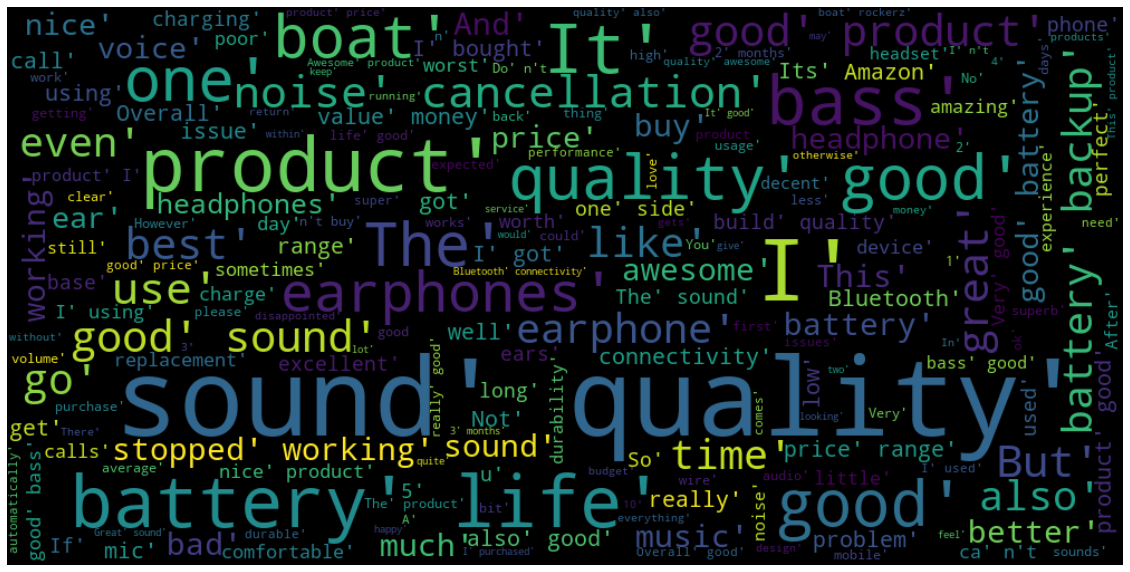

In [ ]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
list=[]
for i in boat255["filter"] :
    list.append(i)
slist = str(list)

wordcloud = WordCloud(width=1000, height=500).generate(slist)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
boat255.head() 

,ReviewTitle,ReviewBody,ReviewStar,Product,Negative,Neutral,Positive,Compound,Score,filter
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,0.268,0.657,0.075,-0.9580,Negative,"[No, doubt, great, bass, great, extent, noise,..."
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,0.073,0.884,0.043,-0.2528,Negative,"[This, earphones, unreliable, ,, bought, 15, d..."
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,0.021,0.928,0.052,0.5569,Positive,"[bought, itfor, 999, ,, I, purchased, second, ..."
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,0.061,0.833,0.105,0.1779,Positive,"[Its, sound, quality, adorable, ., overall, go..."
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,0.093,0.760,0.147,0.2831,Positive,"[Its, Awesome, ..., Good, sound, quality, &, 8..."
